# datetime 

In [2]:
from datetime import datetime

In [3]:
curr_datetime = datetime.now()
print(curr_datetime)

2022-05-03 21:39:55.394859


In [4]:
curr_date = curr_datetime.date()
print(curr_date)

2022-05-03


In [12]:
curr_time = curr_datetime.time()
print(curr_time)

21:39:55.394859


# 매수시간(초)
유튜브: https://youtu.be/5BJJi91clbs

In [6]:
import pandas as pd
import numpy as np
import datetime

from scipy.stats import ttest_ind

from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_csv('data.csv')
df['주문일자'] = pd.to_datetime(df['주문일자'])
df['매수시간(초)'] = pd.to_datetime(df['매수시간'])
df['매수시간(초)'] = df['매수시간(초)'].apply(lambda x : x.time().second)

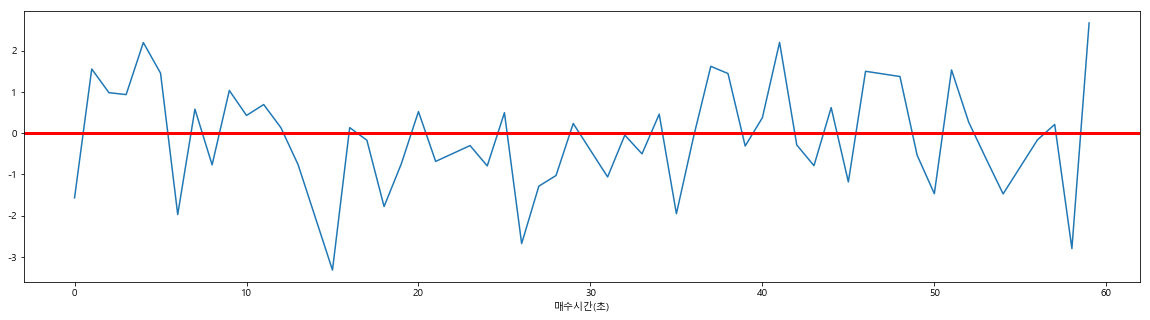

In [10]:
df.groupby('매수시간(초)')['수익률'].mean().plot()
plt.axhline(y=0, color='r', linewidth=3)
plt.rcParams["figure.figsize"] = (20, 5)
plt.show()

In [9]:
dates = df['주문일자'].unique()
periods = [5,20,len(dates)]
pieces = []

for period in periods:
    frame = df[df['주문일자'] >= dates[-period]]
    
    A = frame[(frame['매수시간(초)'] >= 40) | (frame['매수시간(초)'] < 10)]['수익률']
    B = frame[(frame['매수시간(초)'] < 40) & (frame['매수시간(초)'] >= 10)]['수익률']
    
    A_mean = round(A.mean(),2)
    B_mean = round(B.mean(),2)   
    p_value = round(ttest_ind(A, B)[1],3)
    
    pieces.append([period, A_mean, B_mean, p_value])
    
dataframe = pd.DataFrame(pieces, columns=['기간','x>=40 or x<10','10<=x<40','p-value'])
dataframe = dataframe.set_index('기간')
dataframe

,x>=40 or x<10,10<=x<40,p-value
기간,,,
5,0.26,-0.12,0.553
20,0.21,-0.34,0.160
22,0.43,-0.35,0.048
